## Prior to peer review:
##### Summarized from: https://advances.sciencemag.org/content/information-authors
1. Up to ten figures and/or tables, combined.
2. up to 60 references
3. Allows for supplementary materials
4. Total length under 15,000 words
5. Provide a long (135 characters) and short title (50 characters) for paper
6. Section order: Intro, Results, Discussion, Materials and Methods, References, Acknowledgments
7. Subheadings should either be all phrases, or all full sentences. Keep <10 words.
8. No new data in discussion, all data should be presented in Results.
9. Materials and Methods: Start with Experimental Design to describe objective of studies and design of the studies. Include Statistical Analysis that describes statistical methods such that reader could reproduce results; value for each statistical test performed should be labeled in relevant figures presented in Results.
10. Acknowledgments should list funding info, authors' contributions to paper, competing interests, a section on data and materials availability
11. Visit 'https://advances.sciencemag.org/content/information-authors' for details on the "Experimental Design and Statistics Guidelines" for writing the methods section.
12. Figure widths 1, 1.5, or 2 column (3.5, 5.0, 7.3 inches wide). No title on figure, figure goes in caption (also called 'legend' in the authors' guide). Solid symbols for plotting when possible, 6pt minimum symbol size, line width minimum 0.5pt. Scales and axes should not extend beyond the range of data plotted. Common axis labels not repeated. No grid lines or minor tick marks. Do not use red-green color combos. Sans-serif font required; Myriad font preferred for text. Regarding scientific notation -- When an individual value must be presented as an exponential, use correct form: 6 × 10–3, not 6e-03. Avoid shading with light lines or screen-shades; use black and white, hatched, cross-hatched designs for emphasis. Capitalize first letters in labels only, not every word. Units should be included in parentheses with SI notation. Variables are set in italics or plain greek letters; vectors are roman boldface. Type on top of color in a color figure should be boldface, avoid using color type (ie color-on-color?). Include leading zeroes on all decimals. Use letters to segregate multi-part images; letters should be boldface, 9pt in the upper-left corner of each figure part. If figure parts are images, set the letter into the image so as to not add white space around the image. Use 300dpi images.
13. SET AS DOUBLE-SPACED THROUGHOUT TEXT FOR SUBMISSION! Includes text, tables, fig legends, refs, everything. 
14. For LaTeX, submit as a PDF file
15. If preparing a supplementary materials section, include it in the main PDF for the initial submission in a new section labeled 'Supplementary Materials'.

##### Some notes on finishing this paper for SciAdv, AFTER peer review process:
1. Remove `\ref{Fig1}` and instead type out 'Fig. 1' in the paper.
2. For the table summary figure, generate this elsewhere and save as an image.
3. Make sure no spaces between citations in multi-citation cites (use the \cite command)
4. For *final* submission, \figure environment should not be used. Figure captions should be included at the end of the source file with figure graphics uploaded separately based on AAAS art department instructions. See author information page 'Figure legends' and 'Figures' sections.
5. Minimize use of any .sty and .bst files, aside from the two provided by AAAS (scicite.sty and ScienceAdvances.bst)

### Important items for figures for Scientific Advances:
1. Size: (3.5, 5.0, 7.3 inches wide)
2. No titles, caption should start with a sentence or bolded phrase describing the contents of the figure.
3. Solid symbols for plotting when possible, 6pt minimum symbol size, line width minimum 0.5pt. 
4. Scales and axes should not extend beyond the range of data plotted. 
5. Common axis labels not repeated. 
6. No grid lines or minor tick marks. 
7. Do not use red-green color combos. 
8. Sans-serif font required; Myriad font preferred for text. 
9. Regarding scientific notation -- When an individual value must be presented as an exponential, use correct form: 6 × 10–3, not 6e-03. 
10. Avoid shading with light lines or screen-shades; use black and white, hatched, cross-hatched designs for emphasis. 
11. Capitalize first letters in labels only, not every word. 
12. Units should be included in parentheses with SI notation.
13. Variables are set in italics or plain greek letters; vectors are roman boldface.
14. Type on top of color in a color figure should be boldface, avoid using color type (ie color-on-color?). 
15. Include leading zeroes on all decimals.
16. Use letters to segregate multi-part images; letters should be boldface, 9pt in the upper-left corner of each figure part. If figure parts are images, set the letter into the image so as to not add white space around the image.
17. Use 300dpi images.

In [1]:
%load_ext autoreload
%autoreload 2

import json, os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch

from Experiment import Experiment
from figure_functions import compute_rolling_average, prediction_compare_plot, latent_space_plot, loss_boxplot, training_loss_epochs_plot

In [12]:
# Set plotting parameters
global_params = {'figure.dpi': 300,
                 'text.usetex': True,
                 'text.latex.preamble': r"\usepackage{amsmath}",
                 'font.family': 'sans-serif',
                 'savefig.dpi': 300,
                 'savefig.bbox': 'tight',
                 'savefig.pad_inches': 0.025,
                 'savefig.transparent': True,
                 #'font.sans-serif': 'Computer Modern Roman',
                }

full_params = {'figure.figsize': (7.3, 3.65),
               'figure.titlesize': 12,
               'axes.labelsize': 10,
               'axes.titlesize': 12,
               'legend.fontsize': 10,
               'xtick.labelsize': 12,
               'ytick.labelsize': 12,
              }

half_params = {'figure.figsize': (3.5, 2.5),
               'figure.titlesize': 10,
               'lines.linewidth' : 1,
               'lines.markersize' : 6,
               'lines.markeredgewidth': 0.5,
               'axes.labelsize': 9,
               'axes.titlesize': 9,
               'axes.linewidth': 0.5,
               'legend.fontsize': 9,
               'xtick.labelsize': 9,
               'ytick.labelsize': 9,
               'xtick.major.width': 0.5,
               'ytick.major.width': 0.7,
               'ytick.minor.width': 0.5,
               'ytick.major.pad': 0.0,
              }

# Add global parameters to the full_params and half_params dictionaries
full_params.update(global_params)
half_params.update(global_params)

# Set up boxplot-specific options
boxplot_params={'boxplot.boxprops.linewidth': 0.5,
                'boxplot.whiskerprops.linewidth': 0.5,
                'boxplot.capprops.linewidth': 0.5,
                'boxplot.medianprops.linewidth' : 0.5,
               }

# Boolean determining if figures should be saved (all figures or summary-only)
saveallfigs = True
savesumfigs = False

In [13]:
# Load up the different experiments for analysis
s0 = Experiment(experiment_name="S0-NLSL1-Expt1-L20-a", data_file_prefix='S0-Oscillator')

expt = s0

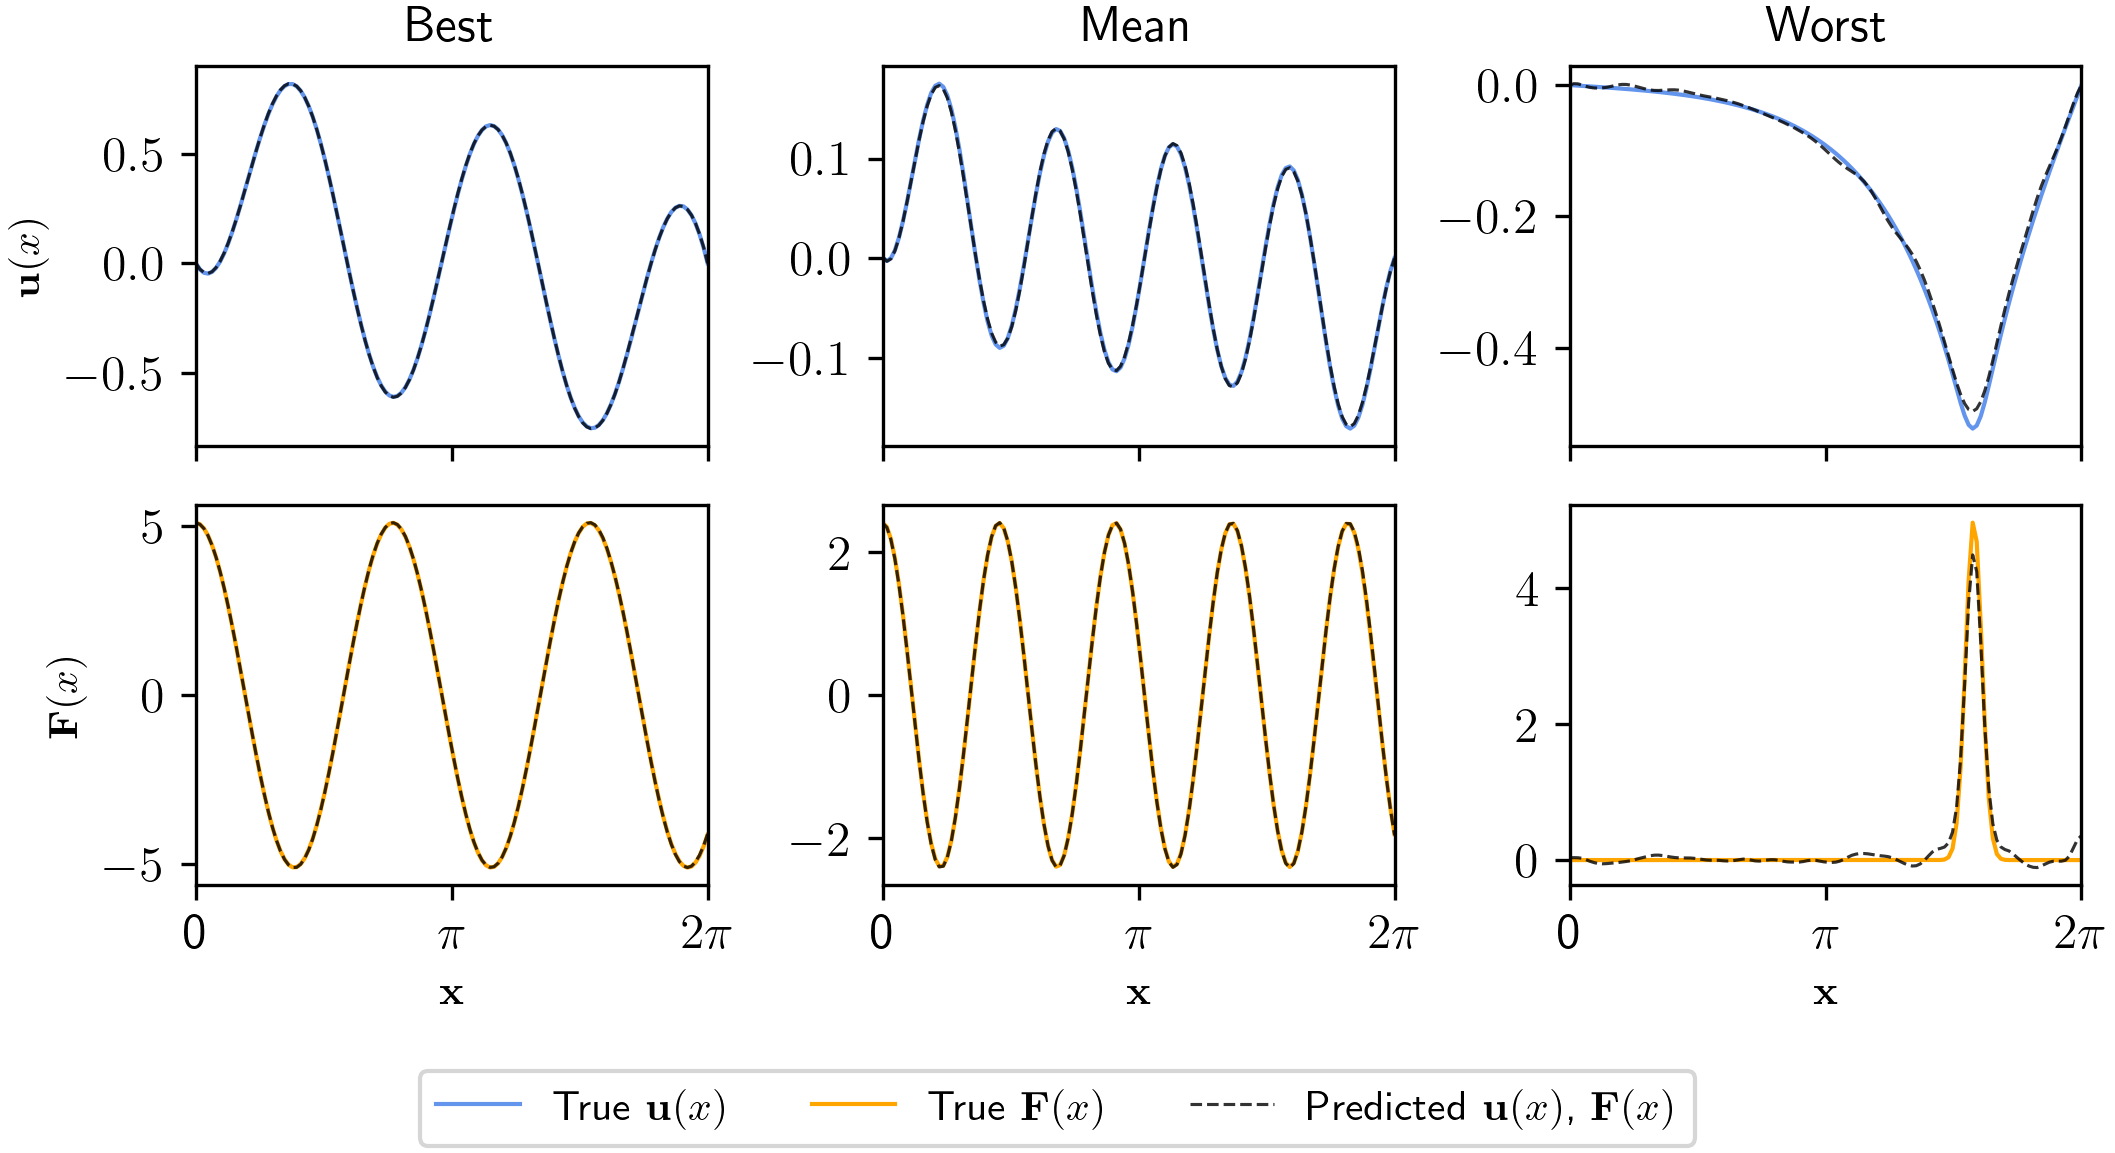

In [14]:
plt.rcdefaults()
plt.rcParams.update(full_params)

######################################
## Predicted vs true plots - test 1
######################################
prediction_compare_plot(expt, "test1")

if saveallfigs:
    plt.savefig("{}-test1.png".format(expt.name), transparent=True)

plt.show()

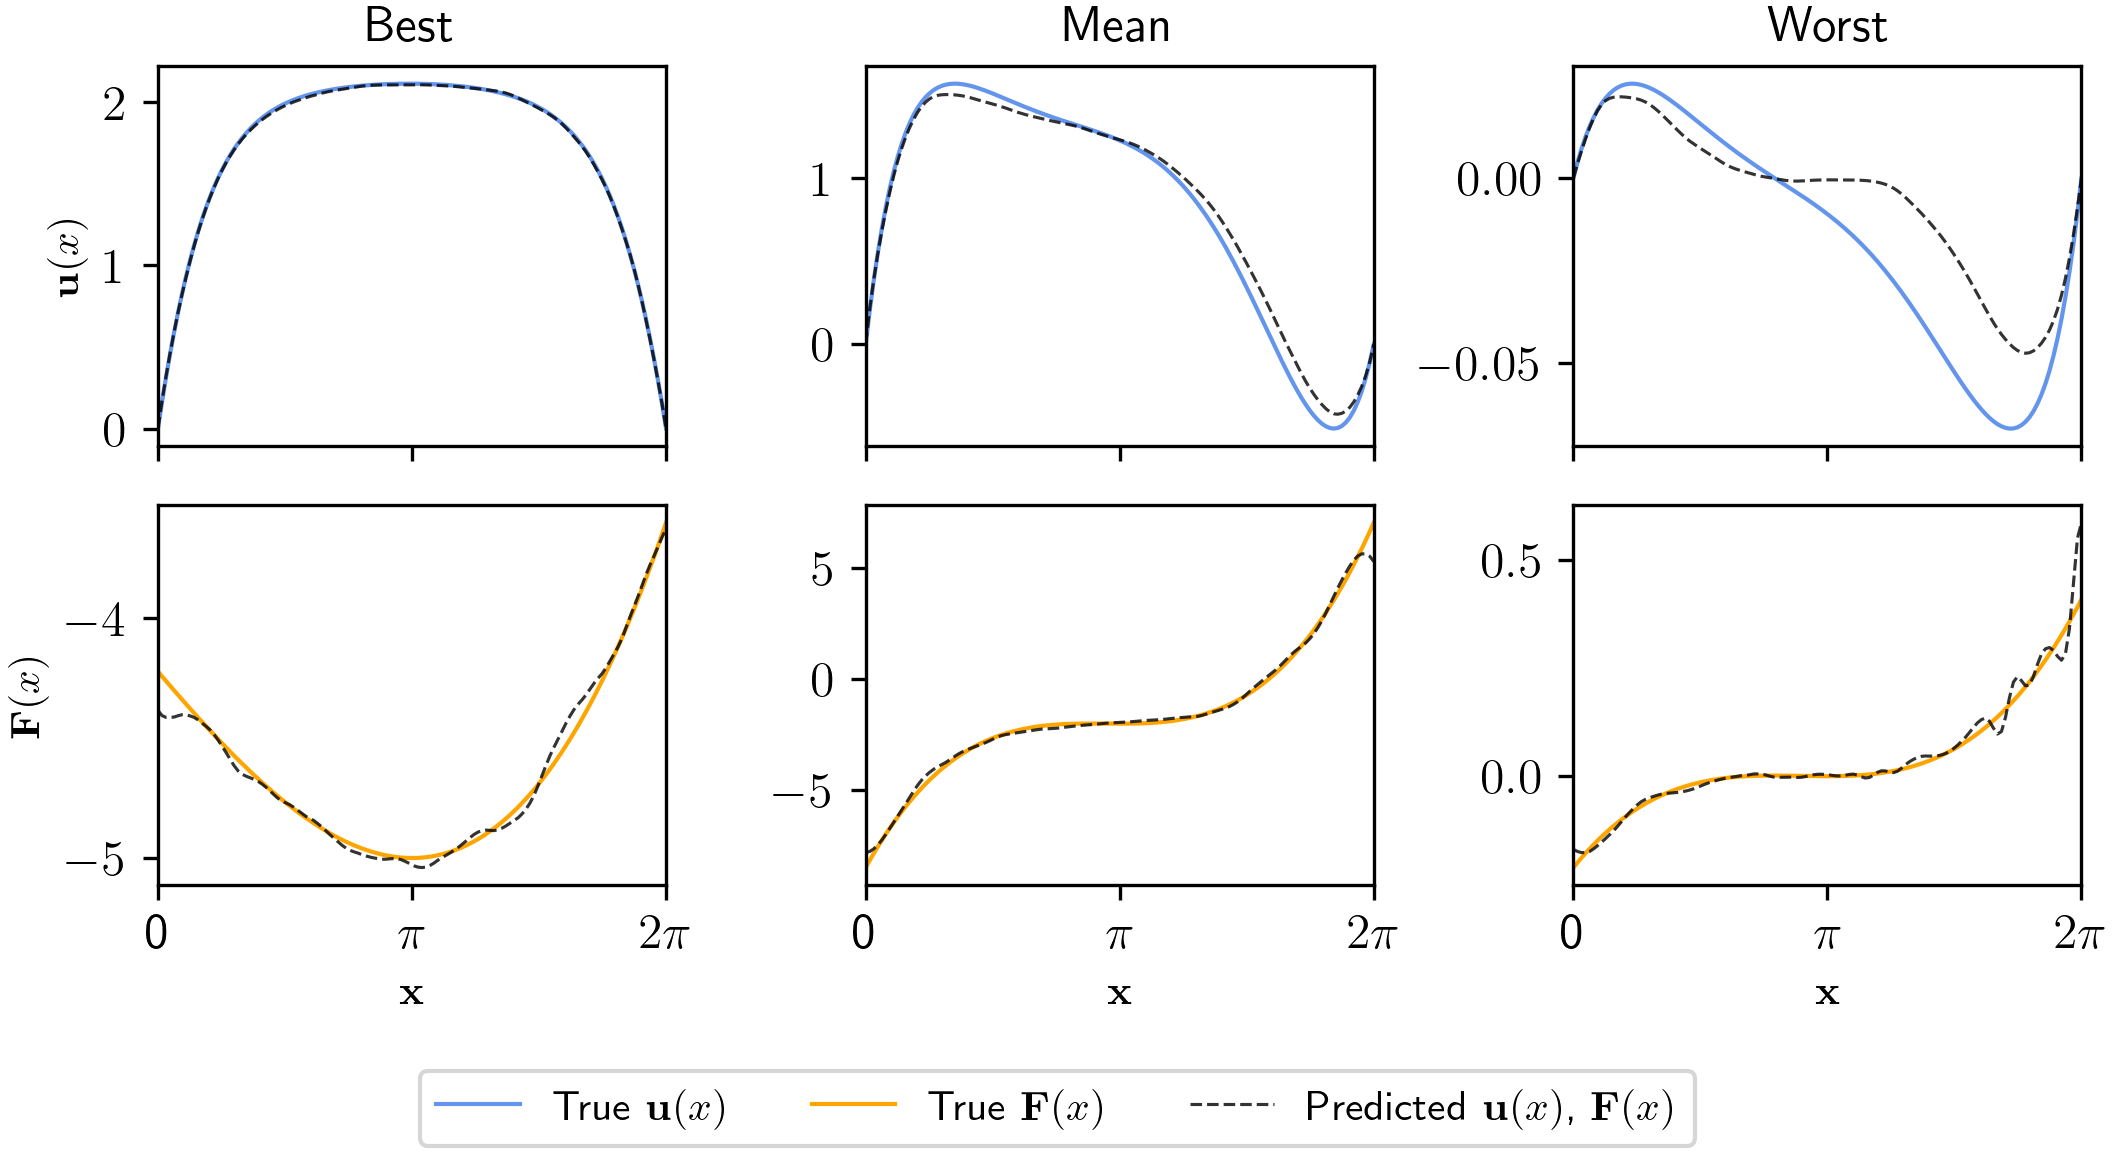

In [15]:
plt.rcdefaults()
plt.rcParams.update(full_params)

######################################
## Predicted vs true plots - test 2
######################################
prediction_compare_plot(expt, "test2")

if saveallfigs:
    plt.savefig("{}-test2.png".format(expt.name), transparent=True)

plt.show()


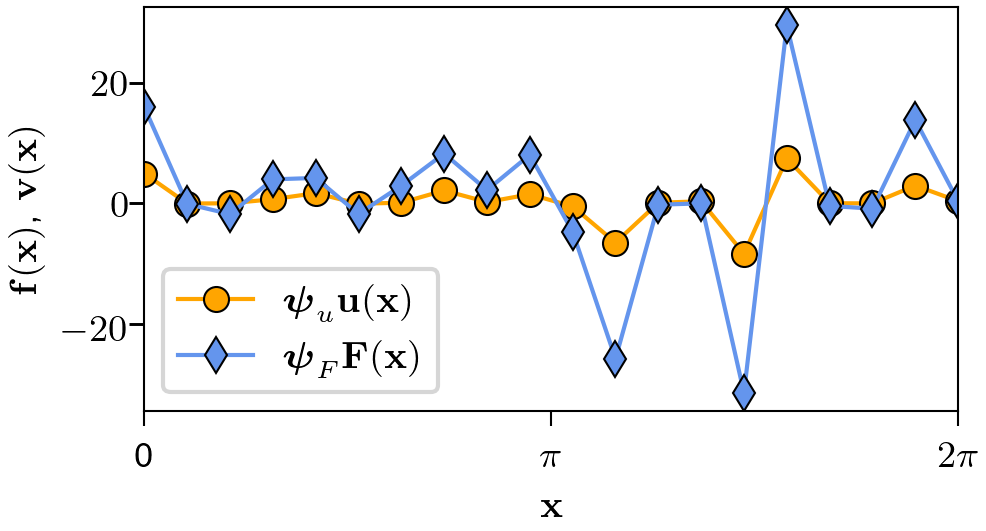

In [16]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (3.5,1.75)
plt.rcParams.update(plot_params)


latent_space_plot(expt, index=14, dataset_name='train1')

if saveallfigs:
    plt.savefig("{}-latentspace.png".format(expt.name), transparent=True)

plt.show()

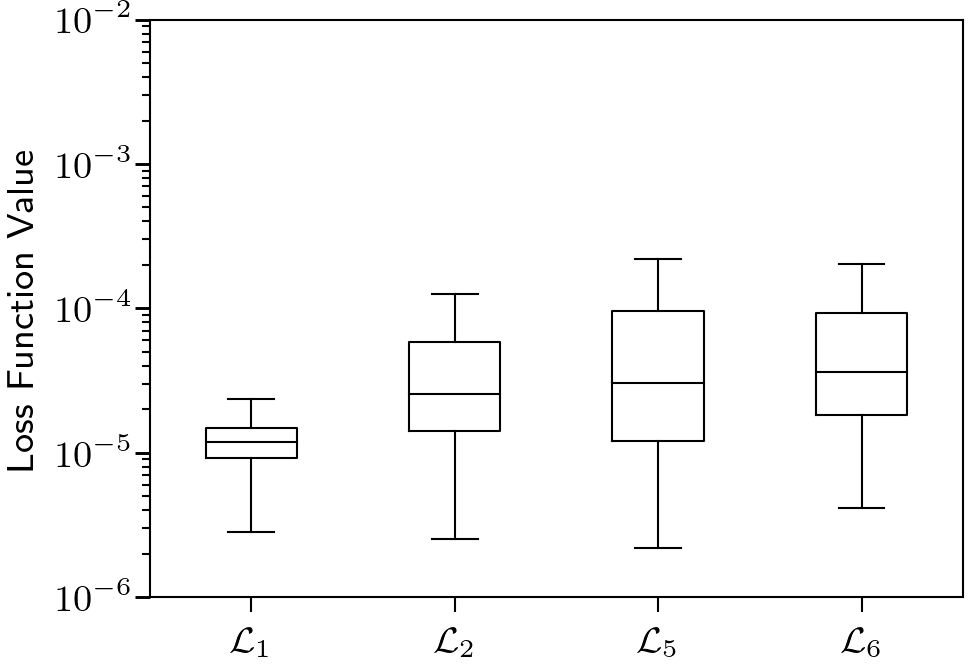

In [24]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params.update(boxplot_params)
plt.rcParams.update(plot_params)

loss_boxplot(expt, dataset_name='test1')

# Save, if saving figures
if saveallfigs or savesumfigs:
    plt.savefig("{}-boxplot.svg".format(expt.name))

plt.show()

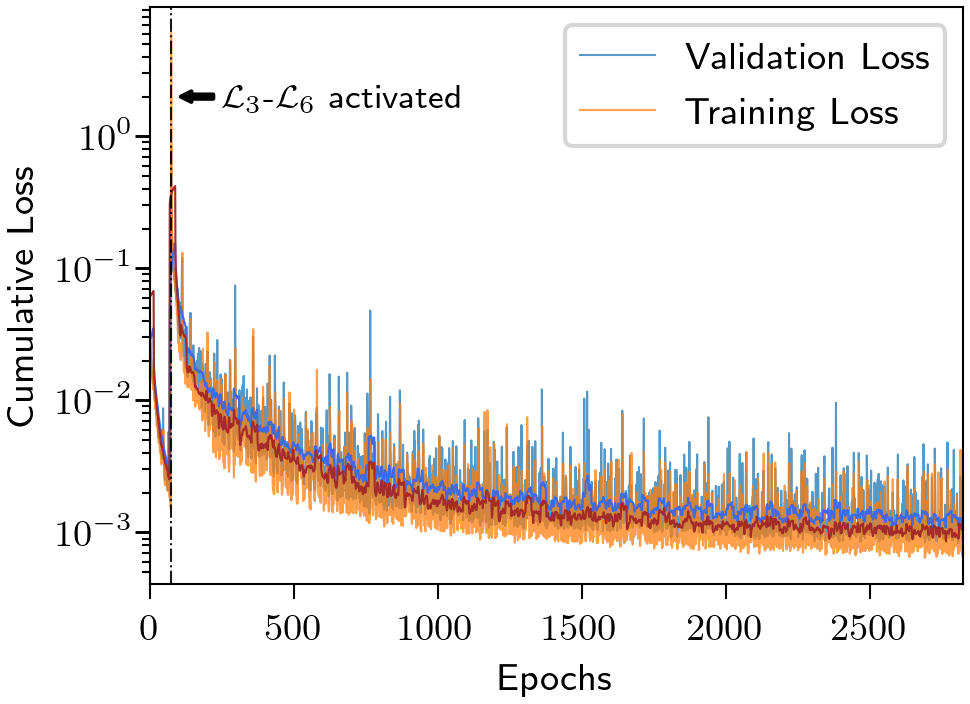

In [18]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['lines.linewidth'] = 0.5
plot_params['font.size'] = 8
plt.rcParams.update(plot_params)

###########################
## Val/Train Loss Curves
###########################
training_loss_epochs_plot(expt, roll_window=20)

if saveallfigs:
    plt.savefig("{}-TrainingLoss.png".format(expt.name), transparent=True)

plt.show()

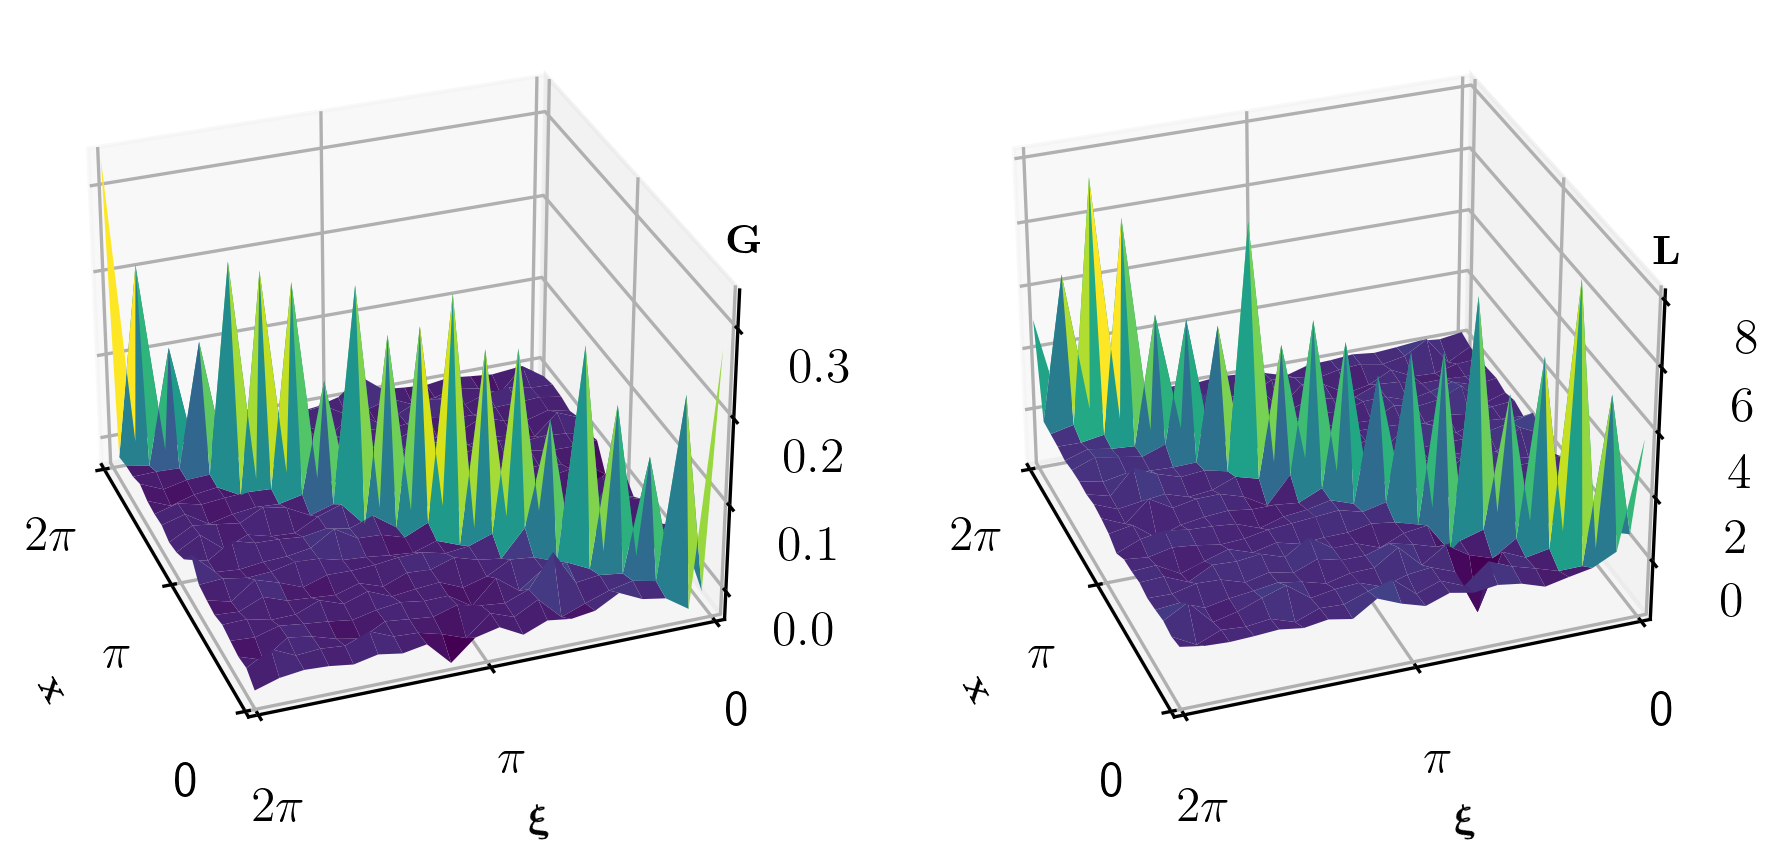

In [19]:
plt.rcdefaults()
plt.rcParams.update(full_params)

# Grab the relevant L and G matrices
L = expt.L
G = expt.G

# Set up and plot
x = np.linspace(0,2*np.pi, L.shape[0])
X,XI = np.meshgrid(x,x)

surf_opts = dict(rcount=128, ccount=128, antialiased=True, cmap='viridis')

fig = plt.figure(figsize=(7.3,3.65))

# set up the axes for the first plot, plot G
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, XI, G, **surf_opts)

# Format x-axis
ax.set_xlabel(r"$\mathbf{x}$")
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.set_xlim([0,2*np.pi])

# Format xi-axis
ax.set_ylabel(r'$\boldsymbol{\xi}$')
ax.set_yticks([0, np.pi, 2*np.pi])
ax.set_yticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.set_ylim([0,2*np.pi])

# Place the z-axis label using text command
ax.text(x=0, y=0, z=0.38, s=r'$\mathbf{G}$')#rotation_mode=None, rotation=180)

# Set up the view position angle
ax.view_init(30,160)


# set up the axes for the second plot, plot L
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, XI, L, **surf_opts)

# Format x-axis
ax.set_xlabel(r"$\mathbf{x}$")
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.set_xlim([0,2*np.pi])

# Format xi-axis
ax.set_ylabel(r'$\boldsymbol{\xi}$')
ax.set_yticks([0, np.pi, 2*np.pi])
ax.set_yticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.set_ylim([0,2*np.pi])

# Place the z-axis label using text command
ax.text(x=0, y=0, z=9.0, s=r'$\mathbf{L}$')#rotation_mode=None, rotation=180)

# Set up the view position angle
ax.view_init(30,160)

# Change spacing
#plt.subplots_adjust(wspace=-0.18, hspace=0.0)#, left=0.05, right=0.07)


if saveallfigs:
    plt.savefig("{}-L_and_G.png".format(expt.name), transparent=True)
    
plt.show()

In [20]:
# Load up the other 1D experiments for making summary plot boxplot
s1 = Experiment(experiment_name="S1-NLSL1-Expt1-L20-a", data_file_prefix='S1-NLSL1')
s2 = Experiment(experiment_name="S2-NLSL2-Expt1-L20-b", data_file_prefix='S2-NLSL2')

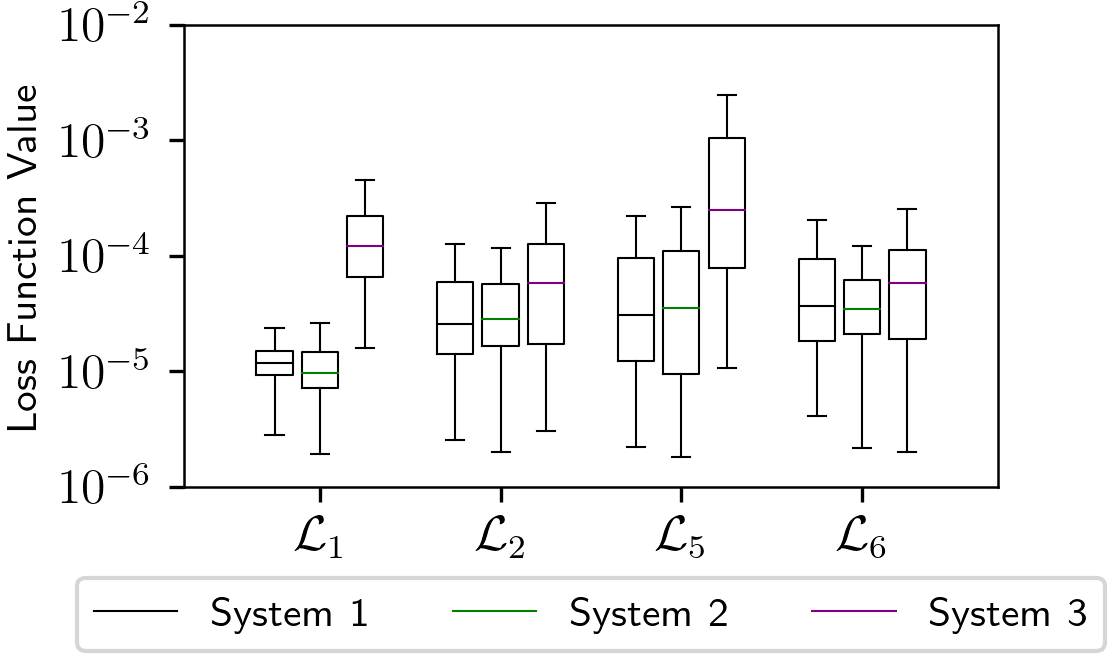

In [25]:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params.update(boxplot_params)
plot_params['axes.linewidth'] = 0.6
plt.rcParams.update(plot_params)


# Generate loss data, and set labels
s0_losses = s0.compute_losses('test1')
s1_losses = s1.compute_losses('test1')
s2_losses = s2.compute_losses('test1')
labels = [r"$\mathcal{L}_1$", r"$\mathcal{L}_2$",  r"$\mathcal{L}_5$", r"$\mathcal{L}_6$"]

# Set up figure, axes
fig = plt.figure(figsize=(3.5,2))

# Plot each series
b0=plt.boxplot(s0_losses,
               positions=[0.75,1.75,2.75,3.75],
               medianprops={'color': 'black'},
               showfliers=False, widths=0.2)

b1=plt.boxplot(s1_losses,
               positions=[1, 2, 3, 4],
               medianprops={'color': 'green'},
               showfliers=False, widths=0.2)

b2=plt.boxplot(s2_losses,
               positions=[1.25,2.25,3.25,4.25],
               medianprops={'color': 'purple'},
               showfliers=False, widths=0.2)

# Format the X axis
plt.xticks([1,2,3,4], labels)

# Format the Y-Axis
plt.ylabel("Loss Function Value")
plt.ylim([1e-6, 1e-2])
plt.yscale('log')
ax = plt.gca()
ax.set_yticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2])
ax.set_yticklabels([r"$10^{-6}$", r"$10^{-5}$", r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$"])

# Format the legend
plt.legend([b0['medians'][0], b1['medians'][0], b2['medians'][0]],
           ["System 1", "System 2", "System 3"],
           ncol=3, loc='lower center', bbox_to_anchor=(0.5,-0.4))


# Save, if saving figures
if saveallfigs or savesumfigs:
    plt.savefig("{}-summary_boxplot.svg".format(expt.name))


plt.show()

S0-NLSL1-Expt1-L20-a
S1-NLSL1-Expt1-L20-a
S2-NLSL2-Expt1-L20-b


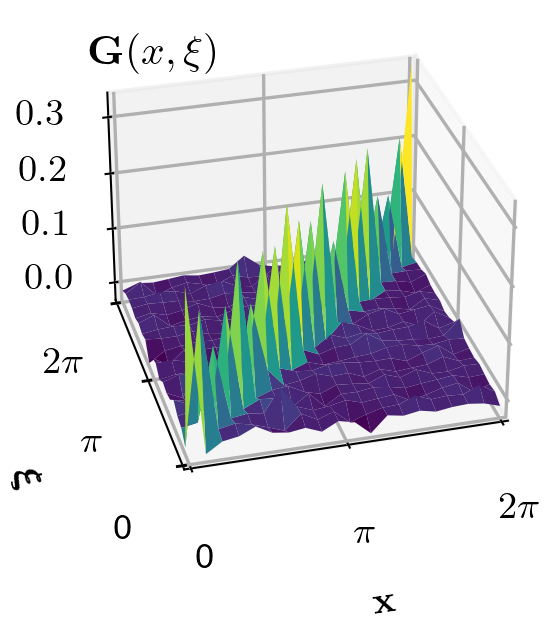

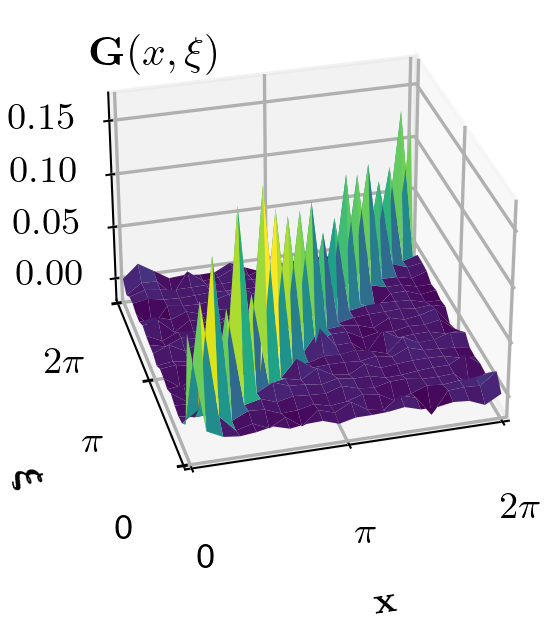

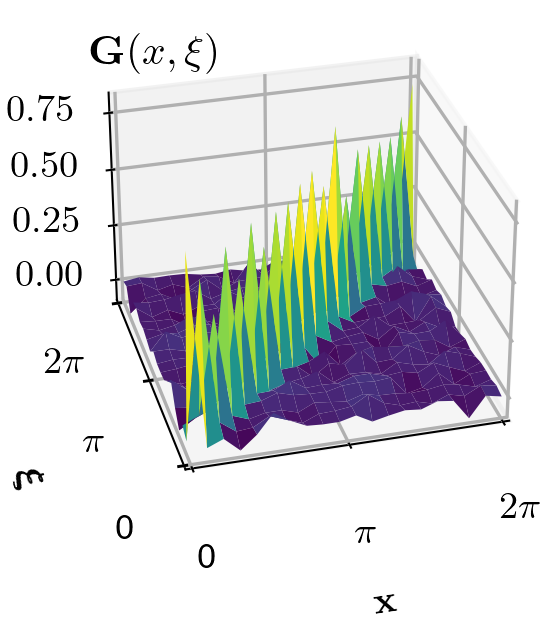

In [44]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.2,2.2)
plt.rcParams.update(plot_params)



# Set up and plot
x = np.linspace(0,2*np.pi, s0.G.shape[0])
X,XI = np.meshgrid(x,x)
# Surface plotting options
surf_opts = dict(rcount=128, ccount=128, antialiased=True, cmap='viridis')

figs = []
for expt in [s0, s1, s2]:
    print(expt.name)
    
    # Initialize a figure
    fig = plt.figure()

    # set up the axes for the first plot, plot G
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(X, XI, expt.G, **surf_opts)

    # Format x-axis
    ax.set_xlabel(r"$\mathbf{x}$")
    ax.set_xticks([0, np.pi, 2*np.pi])
    ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
    ax.set_xlim([0,2*np.pi])

    # Format xi-axis
    ax.set_ylabel(r'$\boldsymbol{\xi}$')
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(["0", r"$\pi$", r"$2\pi$"])
    ax.set_ylim([0,2*np.pi])

    # Place the z-axis label using text command
    ax.text(x=-0.5, y=2*np.pi, z=1.2*np.max(expt.G), s=r'$\mathbf{G}(x,\xi)$')#rotation_mode=None, rotation=180)

    # Set up the view position angle
    ax.view_init(30,-105)
    
    # Save the figure reference
    figs.append(fig)
    
if saveallfigs:
    for fig, expt in zip(figs, [s0, s1, s2]):
        plt.figure(fig.number)
        plt.savefig("{}-mini-G.png".format(expt.name))

plt.show()